In [6]:
# 기본 세팅
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import gaussian_kde
from matplotlib import colors as mpl_colors
import os
#font = {'family': 'Tahoma'}
font = {'family': 'Times New Roman'}
plt.rc('font', **font)

import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


/tmp/ipykernel_11033/2228806593.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(average_execution_times.keys())
/tmp/ipykernel_11033/2228806593.py:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(average_execution_times.keys())
/tmp/ipykernel_11033/2228806593.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(average_execution_times.keys())
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New R

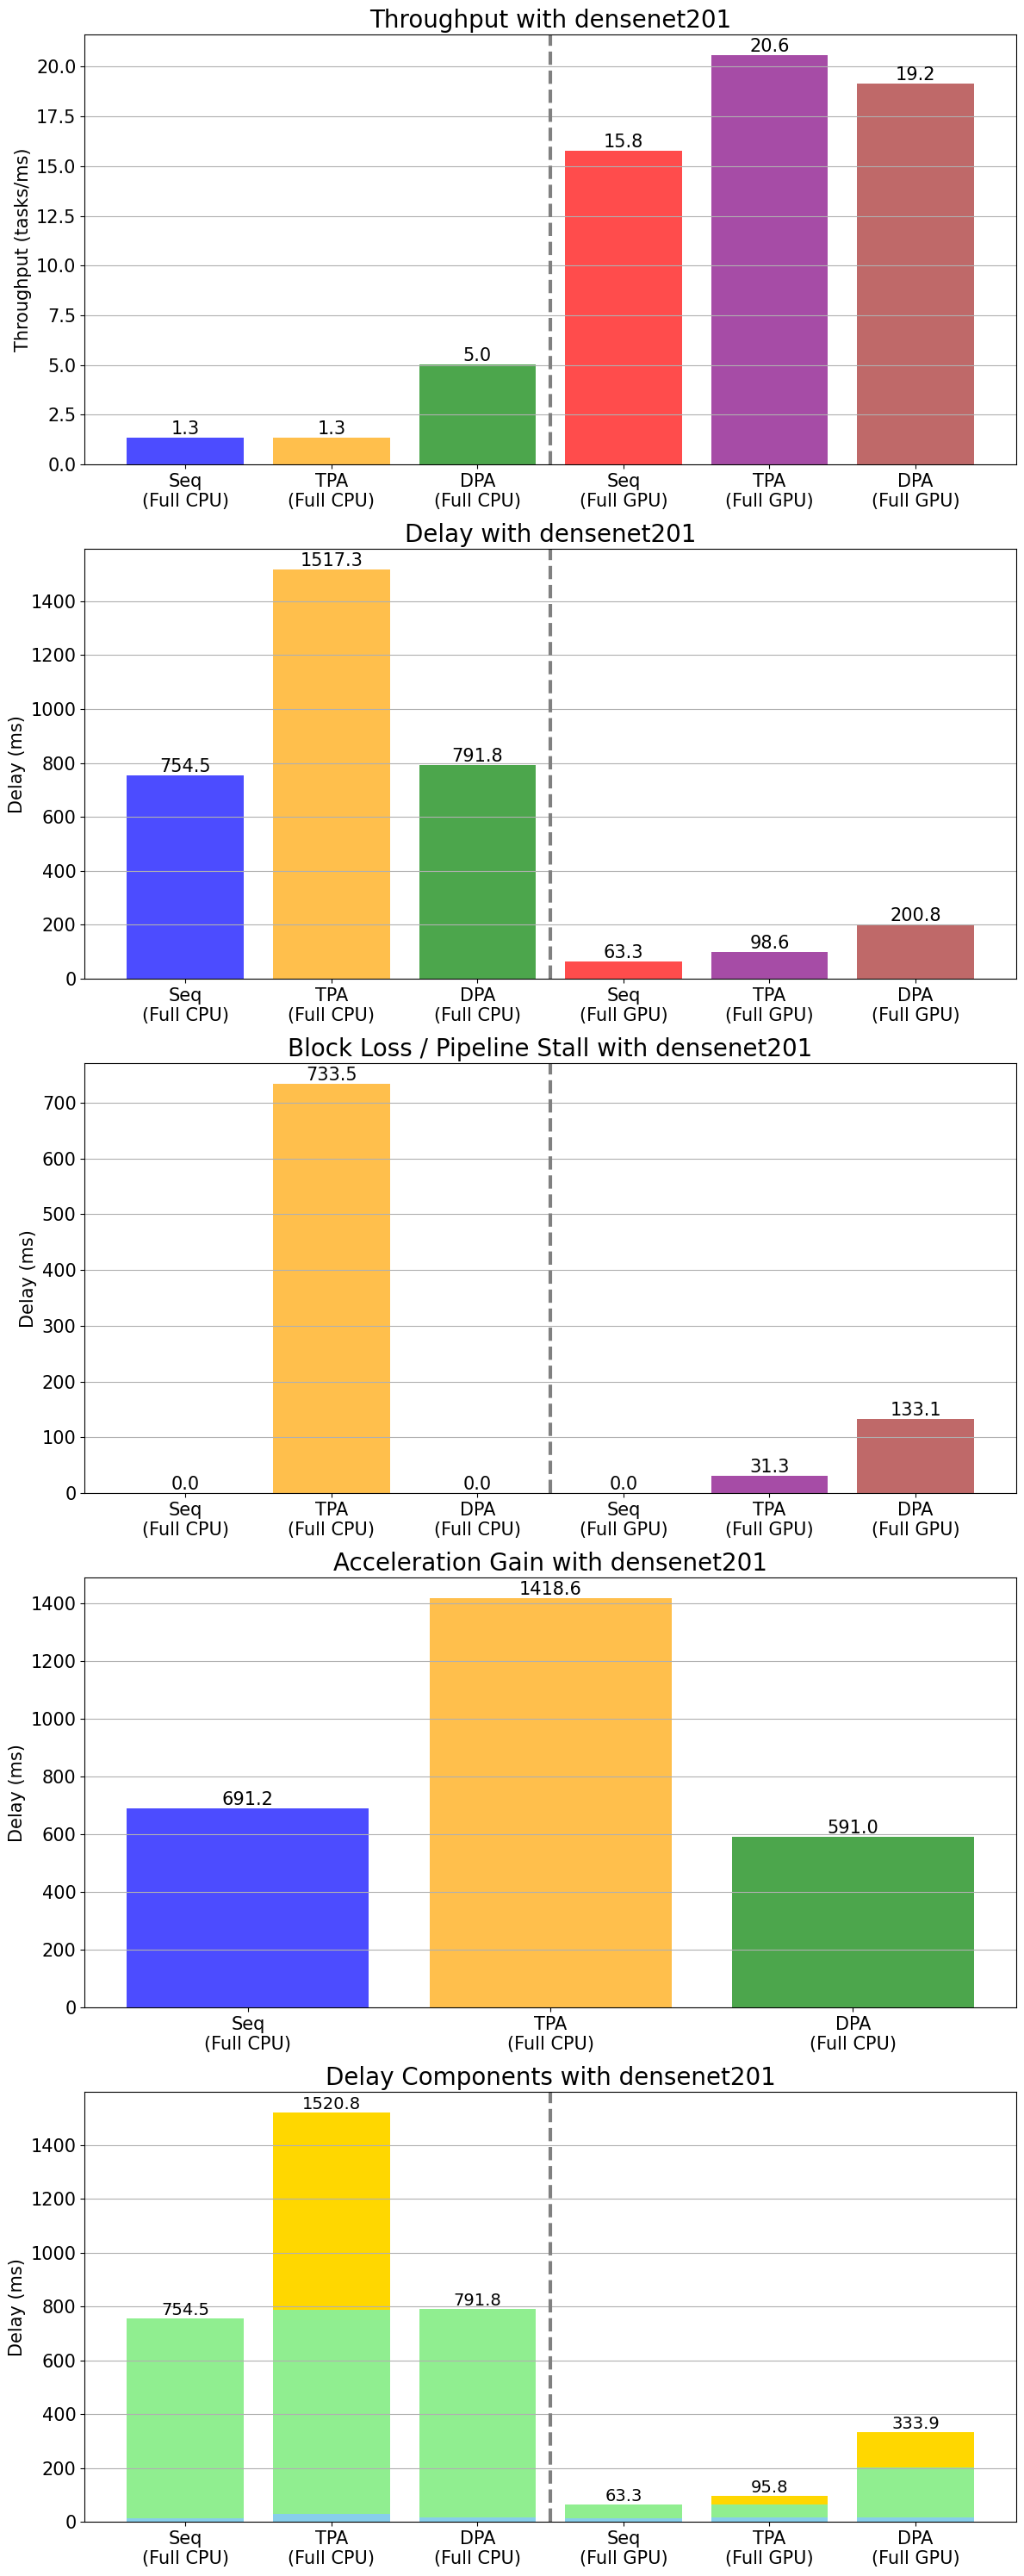

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
model = 'densenet201'
# 파일 경로 설정
files = {
    'Seq\n(Full CPU)': f"../../csv/data-0106/sequential/{model}/sequential_cpu_01core.csv",
    'TPA\n(Full CPU)': f"../../csv/data-0106/pipeline/{model}/pipeline_cpu.csv",
    'DPA\n(Full CPU)': f"../../csv/data-0106/data_parallel/{model}/data-parallel_cpu_4thread.csv",
    'Seq\n(Full GPU)': f"../../csv/data-0106/sequential/{model}/sequential_gpu_01core.csv",
    'TPA\n(Full GPU)': f"../../csv/data-0106/pipeline/{model}/pipeline_gpu.csv",
    'DPA\n(Full GPU)': f"../../csv/data-0106/data_parallel/{model}/data-parallel_gpu_4thread.csv"
}

# 데이터 저장을 위한 딕셔너리
throughput = {}
average_execution_times = {}
block_losses = {}
accel_gains = {}
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
pre_components = {}
infer_components = {}
post_components = {}
block_components = {}

# 파일 별로 데이터 로드 및 평균 계산
for label, file_path in files.items():
    data = pd.read_csv(file_path)
    
    # frame_rate의 평균 계산
    task_num = len(data)
    start_preprocess_time = data["start_preprocess"].iloc[0]
    end_infer_time = data["end_postprocess"].iloc[-1]
    Throughput = task_num / (end_infer_time - start_preprocess_time) * 1000
    throughput[label] = Throughput
    # execution_time의 평균 계산
    average_execution_time = data['execution_time'].mean()
    average_execution_times[label] = average_execution_time
    if "waiting gpu" in data.columns:
        block_loss = data["waiting gpu"].mean()
        block_losses[label] = block_loss
    elif "e_stall" in data.columns:
        block_loss = data["e_stall"].mean()
        block_losses[label] = block_loss
    else:
        block_losses[label] = 0

    if(label == "Seq\n(Full GPU)"):
        accel_gain = average_execution_times["Seq\n(Full CPU)"] - average_execution_times[label]      
        accel_gains[label] = accel_gain
    elif(label == "TPA\n(Full GPU)"):
        accel_gain = average_execution_times["TPA\n(Full CPU)"] - average_execution_times[label]  
        accel_gains[label] = accel_gain
    elif(label == "DPA\n(Full GPU)"):
        accel_gain = average_execution_times["DPA\n(Full CPU)"] - average_execution_times[label]
        accel_gains[label] = accel_gain

    
    pre_component = data["e_preprocess"].mean()
    pre_components[label] = pre_component
    infer_component = data["e_infer"].mean()
    infer_components[label] = infer_component
    post_component = data["e_postprocess"].mean()
    post_components[label] = post_component
    block_components[label] = block_losses[label]






# 1행 2열 subplot 생성
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 30))

# 첫 번째 그래프: Average Frame Rate
bars1 = ax1.bar(throughput.keys(), throughput.values(), color=colors, alpha=0.7)
ax1.set_ylabel('Throughput (tasks/ms)', size = 15)
ax1.set_title(f'Throughput with {model}', size = 20)
#ax1.set_xticklabels(average_frame_rates.keys())
ax1.grid(True, axis = 'y')
ax1.tick_params(labelsize=15)
ax1.axvline(x=2.5, color='gray', linestyle='--', linewidth=3)  # x=2.5 위치에 점선 추가

# 막대 위에 텍스트 추가
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)

# 두 번째 그래프: Average Execution Time
bars2 = ax2.bar(average_execution_times.keys(), average_execution_times.values(), color=colors, alpha=0.7)
#ax2.set_xlabel('File Type')
ax2.set_ylabel('Delay (ms)', size = 15)
ax2.set_title(f'Delay with {model}', size = 20)
#ax2.set_xticklabels(average_execution_times.keys())
ax2.grid(True, axis = 'y')
#ax2.set_ylim(0,1200)
ax2.axvline(x=2.5, color='gray', linestyle='--', linewidth=3)  # x=2.5 위치에 점선 추가

# 막대 위에 텍스트 추가
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
ax2.tick_params(labelsize=15)

# 두 번째 그래프: Average Execution Time
bars3 = ax3.bar(block_losses.keys(), block_losses.values(), color=colors, alpha=0.7)
#ax2.set_xlabel('File Type')
ax3.set_ylabel('Delay (ms)', size = 15)
ax3.set_title(f'Block Loss / Pipeline Stall with {model}', size = 20)
ax3.set_xticklabels(average_execution_times.keys())
ax3.grid(True, axis = 'y')
#ax2.set_ylim(0,1200)
ax3.axvline(x=2.5, color='gray', linestyle='--', linewidth=3)  # x=2.5 위치에 점선 추가

# 막대 위에 텍스트 추가
for bar in bars3:
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
ax3.tick_params(labelsize=15)

# 두 번째 그래프: Average Execution Time
bars4 = ax4.bar(accel_gains.keys(), accel_gains.values(), color=colors, alpha=0.7)
#ax2.set_xlabel('File Type')
ax4.set_ylabel('Delay (ms)', size = 15)
ax4.set_title(f'Acceleration Gain with {model}', size = 20)
ax4.set_xticklabels(average_execution_times.keys())
ax4.grid(True, axis = 'y')
ax4.tick_params(labelsize=15)

#ax2.set_ylim(0,1200)
# 막대 위에 텍스트 추가
for bar in bars4:
    yval = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
ax4.tick_params(labelsize=15)

x_labels = list(pre_components.keys())
pre_values = np.array(list(pre_components.values()))
infer_values = np.array(list(infer_components.values()))
post_values = np.array(list(post_components.values()))
block_values = np.array(list(block_components.values()))
# Plotting
bar1 = ax5.bar(x_labels, pre_values, color='skyblue', label='Preprocess')
bar2 = ax5.bar(x_labels, infer_values, color='lightgreen',bottom=np.array(pre_values), label='Inference')
bar3 = ax5.bar(x_labels, post_values, bottom=np.array(pre_values) + np.array(infer_values), color='coral', label='Postprocess')
bar4 = ax5.bar(x_labels, block_values,
               bottom=np.array(pre_values) + np.array(infer_values) + np.array(post_values),
               color='gold', label='Block Loss')

# Add text labels
for i in range(6):
    total_height = (pre_values[i] + infer_values[i] +
                    post_values[i] + block_values[i])
    plt.text(i, total_height, f'{total_height:.1f}', ha='center', va='bottom', fontsize=14)

ax5.set_ylabel('Delay (ms)', size = 15)
ax5.set_title(f'Delay Components with {model}', size = 20)
ax5.set_xticklabels(average_execution_times.keys())
ax5.grid(True, axis = 'y')
ax5.axvline(x=2.5, color='gray', linestyle='--', linewidth=3)  # x=2.5 위치에 점선 추가
ax5.tick_params(labelsize=15)

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로 설정
files = {
    'Sequential': "../../csv/data-0106/sequential/densenet201/sequential_gpu_01core.csv",
    'Pipeline': "../../csv/data-0106/pipeline/densenet201/pipeline_gpu.csv",
    'Data-Parallel': "../../csv/data-0106/data_parallel/densenet201/data-parallel_cpu_4thread.csv"
}

# 데이터 저장을 위한 딕셔너리
average_frame_rates = {}
average_execution_times = {}

# 파일 별로 데이터 로드 및 평균 계산
for label, file_path in files.items():
    data = pd.read_csv(file_path)
    
    # frame_rate의 평균 계산
    average_frame_rate = data['frame_rate'].mean()
    average_frame_rates[label] = average_frame_rate
    
    # execution_time의 평균 계산
    average_execution_time = data['execution_time'].mean()
    average_execution_times[label] = average_execution_time

# 1행 2열 subplot 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 그래프: Average Frame Rate
bars1 = ax1.bar(average_frame_rates.keys(), average_frame_rates.values(), color='orange')
#ax1.set_xlabel('File Type')
ax1.set_ylabel('Frame rate (fps)', size = 30)
#ax1.set_title('Average Frame Rate Comparison')
ax1.set_xticklabels(average_frame_rates.keys())
ax1.grid(True, axis = 'y')
ax1.tick_params(labelsize=15)
ax1.set_ylim(0,60)

# 막대 위에 텍스트 추가
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)

# 두 번째 그래프: Average Execution Time
bars2 = ax2.bar(average_execution_times.keys(), average_execution_times.values(), color='skyblue')
#ax2.set_xlabel('File Type')
ax2.set_ylabel('Delay (ms)', size = 30)
#ax2.set_title('Average Execution Time Comparison')
ax2.set_xticklabels(average_execution_times.keys())
ax2.grid(True, axis = 'y')
ax2.set_ylim(0,700)
# 막대 위에 텍스트 추가
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', size = 15)
ax2.tick_params(labelsize=15)
plt.tight_layout()
plt.show()


/tmp/ipykernel_11033/905792267.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(average_frame_rates.keys())
/tmp/ipykernel_11033/905792267.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(average_execution_times.keys())
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfon

ValueError: Image size of 1033x741953 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x500 with 2 Axes>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

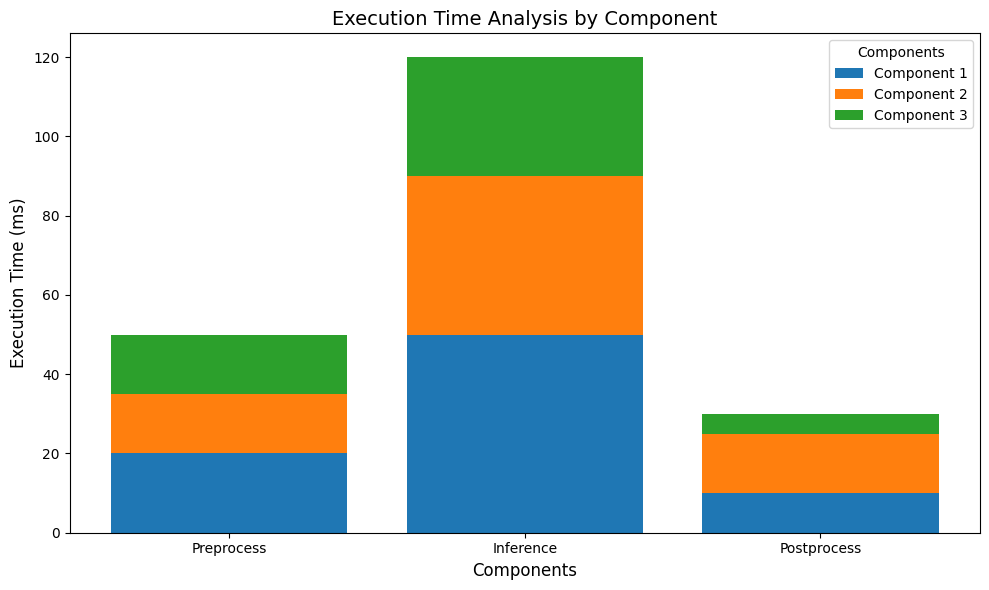

In [11]:
import matplotlib.pyplot as plt

# 데이터 예제: 각 구간별 실행 시간
components = ['Preprocess', 'Inference', 'Postprocess']
execution_times = {
    'Component 1': [20, 50, 10],  # Component 1의 실행 시간
    'Component 2': [15, 40, 15],  # Component 2의 실행 시간
    'Component 3': [15, 30, 5]    # Component 3의 실행 시간
}

# 누적 막대그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 누적 값을 계산하며 막대그래프 그리기
bottom_values = [0] * len(components)
for component, times in execution_times.items():
    ax.bar(components, times, bottom=bottom_values, label=component)
    # 누적 값을 업데이트
    bottom_values = [bottom + time for bottom, time in zip(bottom_values, times)]

# 그래프 레이블 설정
ax.set_xlabel('Components', size=12)
ax.set_ylabel('Execution Time (ms)', size=12)
ax.set_title('Execution Time Analysis by Component', size=14)
ax.legend(title='Components')

plt.tight_layout()
plt.show()